<a href="https://colab.research.google.com/github/Aman-rkl/Data_Analysis/blob/main/uber_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uber Data Analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_csv("/content/sample_data/UberDataset.csv")
print(dataframe.head())
print(dataframe.tail())

   START_DATE START_TIME    END_DATE END_TIME  CATEGORY        START  \
0  2016-01-01      21:11  2016-01-01    21:17  Business  Fort Pierce   
1  2016-01-02      01:25  2016-01-02    01:37  Business  Fort Pierce   
2  2016-01-02      20:25  2016-01-02    20:38  Business  Fort Pierce   
3  2016-01-05      17:31  2016-01-05    17:45  Business  Fort Pierce   
4  2016-01-06      14:42  2016-01-06    15:49  Business  Fort Pierce   

              STOP  MILES          PURPOSE  
0      Fort Pierce    5.1   Meal/Entertain  
1      Fort Pierce    5.0              NaN  
2      Fort Pierce    4.8  Errand/Supplies  
3      Fort Pierce    4.7          Meeting  
4  West Palm Beach   63.7   Customer Visit  
      START_DATE START_TIME    END_DATE END_TIME  CATEGORY             START  \
1151  2016-12-31      13:24  2016-12-31    13:42  Business           Kar?chi   
1152  2016-12-31      15:03  2016-12-31    15:38  Business  Unknown Location   
1153  2016-12-31      21:32  2016-12-31    21:50  Busines

In [3]:
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   START_TIME  1155 non-null   object 
 2   END_DATE    1155 non-null   object 
 3   END_TIME    1155 non-null   object 
 4   CATEGORY    1155 non-null   object 
 5   START       1155 non-null   object 
 6   STOP        1155 non-null   object 
 7   MILES       1156 non-null   float64
 8   PURPOSE     653 non-null    object 
dtypes: float64(1), object(8)
memory usage: 81.4+ KB


In [4]:
dataframe['PURPOSE'].fillna('NOT',inplace=True)
print(dataframe.head())

   START_DATE START_TIME    END_DATE END_TIME  CATEGORY        START  \
0  2016-01-01      21:11  2016-01-01    21:17  Business  Fort Pierce   
1  2016-01-02      01:25  2016-01-02    01:37  Business  Fort Pierce   
2  2016-01-02      20:25  2016-01-02    20:38  Business  Fort Pierce   
3  2016-01-05      17:31  2016-01-05    17:45  Business  Fort Pierce   
4  2016-01-06      14:42  2016-01-06    15:49  Business  Fort Pierce   

              STOP  MILES          PURPOSE  
0      Fort Pierce    5.1   Meal/Entertain  
1      Fort Pierce    5.0              NOT  
2      Fort Pierce    4.8  Errand/Supplies  
3      Fort Pierce    4.7          Meeting  
4  West Palm Beach   63.7   Customer Visit  


/tmp/ipython-input-2348919998.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe['PURPOSE'].fillna('NOT',inplace=True)


In [5]:
dataframe.isnull().sum()

,0
START_DATE,0
START_TIME,1
END_DATE,1
END_TIME,1
CATEGORY,1
START,1
STOP,1
MILES,0
PURPOSE,0


In [6]:
#changing into categories of day and night
dataframe['time'] = pd.DatetimeIndex(dataframe['START_TIME']).hour
print(dataframe['time'])

dataframe['day-night'] = pd.cut(x=dataframe['time'],
                              bins = [-1,10,15,19,24],
                              labels = ['Morning','Afternoon','Evening','Night'])
print(dataframe.head())

0       21.0
1        1.0
2       20.0
3       17.0
4       14.0
        ... 
1151    13.0
1152    15.0
1153    21.0
1154    22.0
1155     NaN
Name: time, Length: 1156, dtype: float64
   START_DATE START_TIME    END_DATE END_TIME  CATEGORY        START  \
0  2016-01-01      21:11  2016-01-01    21:17  Business  Fort Pierce   
1  2016-01-02      01:25  2016-01-02    01:37  Business  Fort Pierce   
2  2016-01-02      20:25  2016-01-02    20:38  Business  Fort Pierce   
3  2016-01-05      17:31  2016-01-05    17:45  Business  Fort Pierce   
4  2016-01-06      14:42  2016-01-06    15:49  Business  Fort Pierce   

              STOP  MILES          PURPOSE  time  day-night  
0      Fort Pierce    5.1   Meal/Entertain  21.0      Night  
1      Fort Pierce    5.0              NOT   1.0    Morning  
2      Fort Pierce    4.8  Errand/Supplies  20.0      Night  
3      Fort Pierce    4.7          Meeting  17.0    Evening  
4  West Palm Beach   63.7   Customer Visit  14.0  Afternoon  


In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   START_DATE  1156 non-null   object  
 1   START_TIME  1155 non-null   object  
 2   END_DATE    1155 non-null   object  
 3   END_TIME    1155 non-null   object  
 4   CATEGORY    1155 non-null   object  
 5   START       1155 non-null   object  
 6   STOP        1155 non-null   object  
 7   MILES       1156 non-null   float64 
 8   PURPOSE     1156 non-null   object  
 9   time        1155 non-null   float64 
 10  day-night   1155 non-null   category
dtypes: category(1), float64(2), object(8)
memory usage: 91.8+ KB


In [8]:
dataframe.dropna(inplace=True)
dataframe.drop_duplicates(inplace=True)

In [9]:
dataframe

,START_DATE,START_TIME,END_DATE,END_TIME,CATEGORY,START,STOP,MILES,PURPOSE,time,day-night
0,2016-01-01,21:11,2016-01-01,21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21.0,Night
1,2016-01-02,01:25,2016-01-02,01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT,1.0,Morning
2,2016-01-02,20:25,2016-01-02,20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20.0,Night
3,2016-01-05,17:31,2016-01-05,17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17.0,Evening
4,2016-01-06,14:42,2016-01-06,15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14.0,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31,01:07,2016-12-31,01:14,Business,Kar?chi,Kar?chi,0.7,Meeting,1.0,Morning
1151,2016-12-31,13:24,2016-12-31,13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site,13.0,Afternoon
1152,2016-12-31,15:03,2016-12-31,15:38,Business,Unknown Location,Unknown Location,16.2,Meeting,15.0,Afternoon
1153,2016-12-31,21:32,2016-12-31,21:50,Business,Katunayake,Gampaha,6.4,Temporary Site,21.0,Night


In [10]:
obj = (dataframe.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
  unique_values[col] = dataframe[col].unique().size
unique_values

{'START_DATE': 294,
 'START_TIME': 689,
 'END_DATE': 294,
 'END_TIME': 681,
 'CATEGORY': 2,
 'START': 177,
 'STOP': 188,
 'PURPOSE': 11}

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'NOT'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices'),
  Text(7, 0, 'Charity ($)'),
  Text(8, 0, 'Commute'),
  Text(9, 0, 'Moving'),
  Text(10, 0, 'Airport/Travel')])

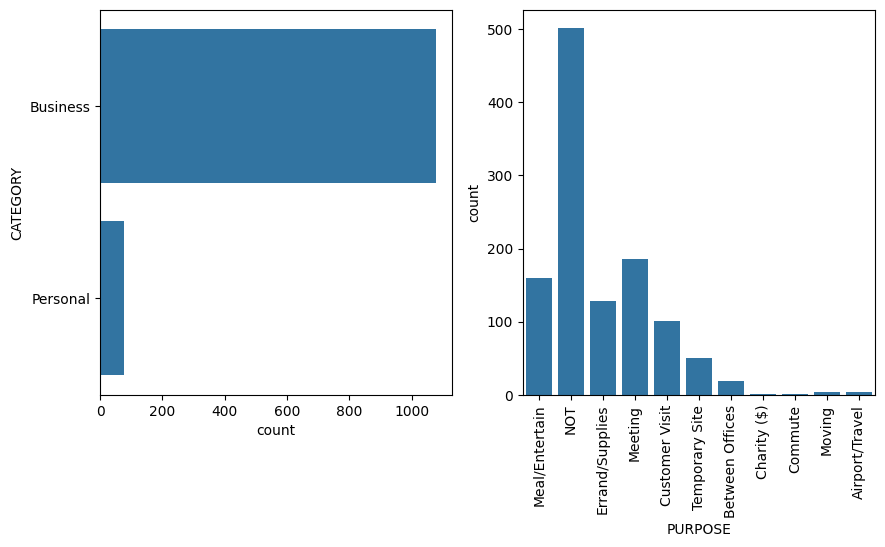

In [11]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(y=dataframe['CATEGORY'])


plt.subplot(1,2,2)
sns.countplot(x=dataframe['PURPOSE'])
plt.xticks(rotation=90)


(array([  0., 100., 200., 300., 400., 500.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500')])

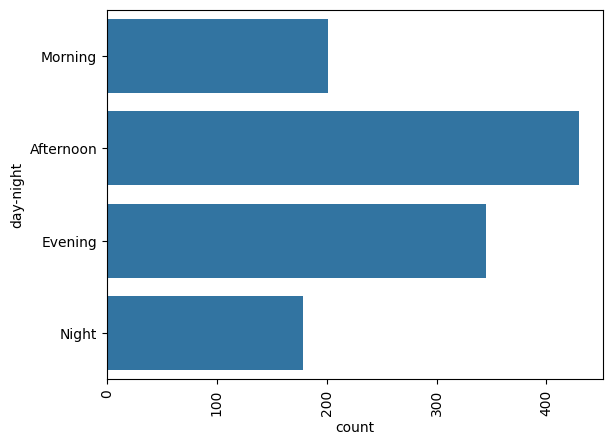

In [12]:
sns.countplot(dataframe['day-night'])
plt.xticks(rotation=90)

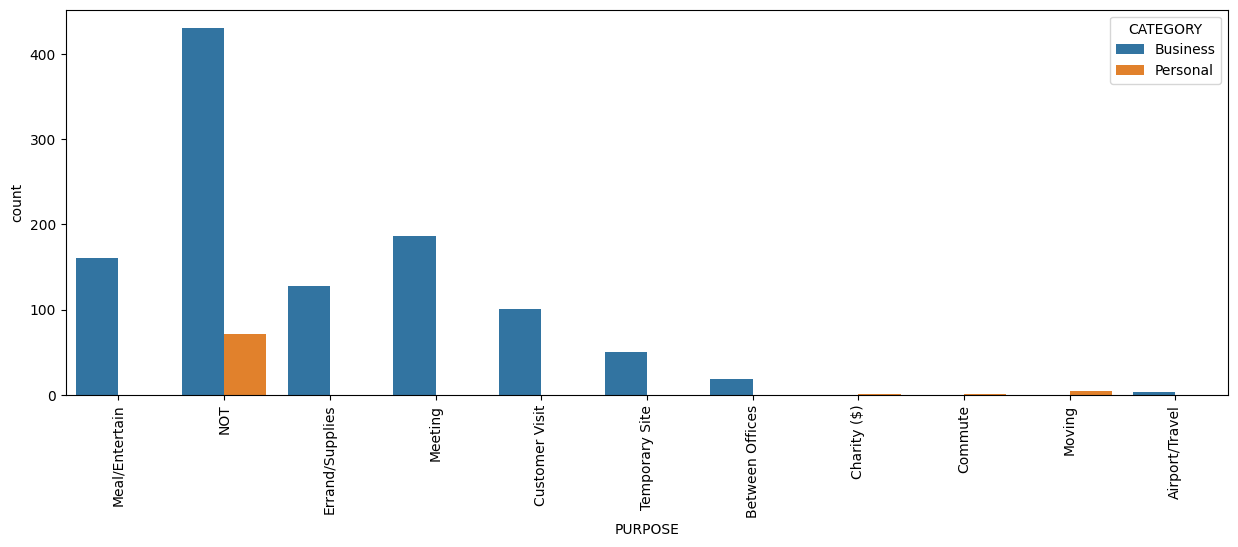

In [13]:
plt.figure(figsize=(15, 5))
sns.countplot(dataframe, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='CATEGORY', ylabel='PURPOSE'>

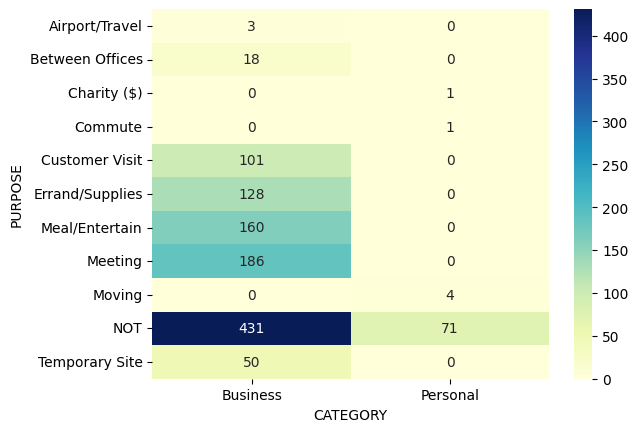

In [14]:
pivot_table = dataframe.pivot_table(index='PURPOSE', columns='CATEGORY', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')

0        1
1        1
2        1
3        1
4        1
        ..
1150    12
1151    12
1152    12
1153    12
1154    12
Name: MONTH, Length: 1154, dtype: int32
MONTH
Jan       61
Feb      115
Mar      113
April     54
May       49
June     107
July     112
Aug      133
Sep       36
Oct      106
Nov      122
Dec      146
Name: count, dtype: int64


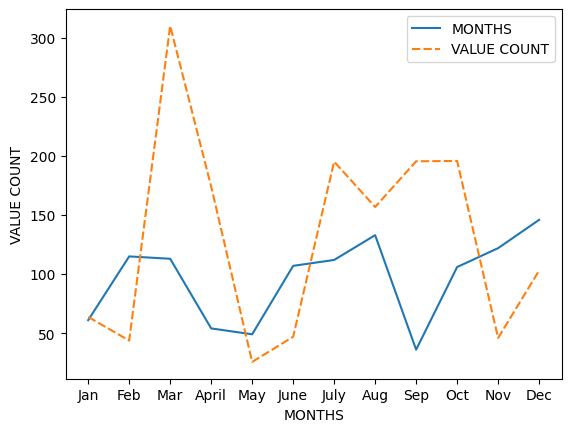

In [15]:
dataframe['MONTH'] = pd.DatetimeIndex(dataframe['START_DATE']).month
print(dataframe['MONTH'])
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
               5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
               9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
dataframe["MONTH"] = dataframe['MONTH'].map(month_label)

mon = dataframe['MONTH'].value_counts(sort=False)
print(mon)
# Month total rides count vs Month ride max count
df = pd.DataFrame({"MONTHS": mon.values,
                   "VALUE COUNT": dataframe.groupby('MONTH',
                                                  sort=False)['MILES'].max()})

p = sns.lineplot(df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")
print(dataframe.groupby('MONTH', sort=False))

Text(0, 0.5, 'COUNT')

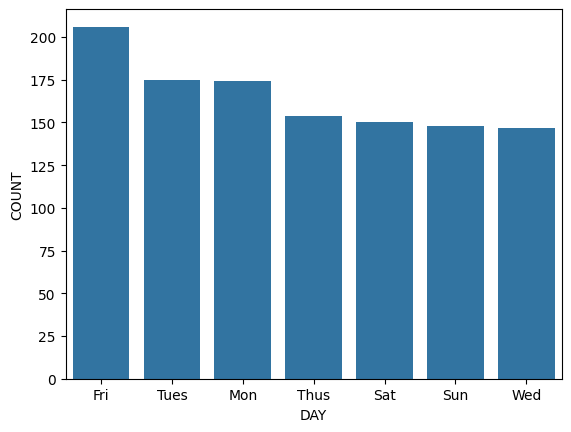

In [16]:
dataframe['START_DATE'] = pd.to_datetime(dataframe['START_DATE'])
dataframe['DAY'] = dataframe['START_DATE'].dt.weekday
day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
dataframe['DAY'] = dataframe['DAY'].map(day_label)

day_label = dataframe.DAY.value_counts(sort=True)
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT')

<Axes: ylabel='MILES'>

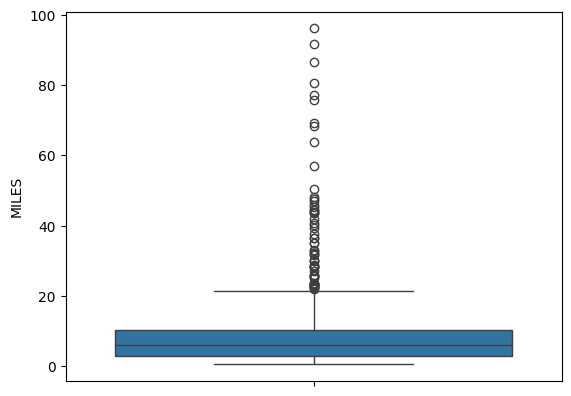

In [20]:
sns.boxplot(dataframe[dataframe['MILES']<100]['MILES'])

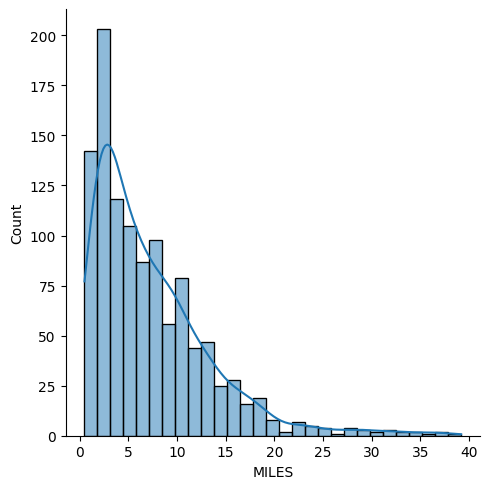

In [45]:
sns.displot(
    dataframe[dataframe['MILES'] < 40]['MILES'],
    kde=True
)
